# Adición de Variables al Dataset Conjunto

## Elección de la Agrupación de los Datos

La primera decisión será elegir la agrupación de los datos, es decir, el intervalo de tiempo mínimo necesario que tomaremos como válido con el objetivo de poder discriminar bien las actividades.

Para ello, probaremos con tres opciones, agrupando de 100 en 100, 200 o 400. 

Esto supondría...

$$n=100 \dfrac{1}{200}=0,5 \text{seg}$$

Conocemos que...

$$f= 200 \dfrac{vueltas}{seg} \implies T=\dfrac{1}{200} = 0.005\text{ seg (tiempo en captar una onda)}$$

Por tanto...

$$T=\dfrac{1}{200}=0.005 \text{ seg} \cdot n_{\text{datos}}= \text{segundos de actividad}$$

Es decir, el movil registra 200 datos cada segundo. 

- ndato = (1/200)*100  =0.5seg
- ndato = (1/200)*300  =1.5seg
- ndato = (1/200)*400  = 2seg (**esto es lo que hemos probado**)

**De acuerdo a lo expuesto, finalmente tomamos dos segundos de señal, que consideramos un tamaño de muestreo adecuado para obtener parámetros estadísticos con capacidad predictiva**

In [1]:
# Importamos las librerías que vamos a usar
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

# Leemos los datos
datos = pd.read_csv("combined_csv_without_features.csv",sep=",")

datos

,time,gFx,gFy,gFz,TgF,actividad,movil,sujeto
0,1.000580,0.0251,0.0138,1.0269,1.027,Standing,Unespecified,Alvaro
1,1.002665,0.0229,0.0109,1.0294,1.030,Standing,Unespecified,Alvaro
2,1.004611,0.0234,0.0118,1.0230,1.023,Standing,Unespecified,Alvaro
3,1.007666,0.0242,0.0121,1.0235,1.024,Standing,Unespecified,Alvaro
4,1.010507,0.0215,0.0135,1.0230,1.023,Standing,Unespecified,Alvaro
...,...,...,...,...,...,...,...,...
89159,8.982020,-0.0371,1.0979,0.1160,1.105,Walking,Unespecified,Marta
89160,8.988941,-0.0340,1.1023,0.1075,1.108,Walking,Unespecified,Marta
89161,8.992377,-0.0435,1.1104,0.0909,1.115,Walking,Unespecified,Marta
89162,8.996913,-0.0428,1.1148,0.0828,1.119,Walking,Unespecified,Marta


In [2]:
datos.describe()

,time,gFx,gFy,gFz,TgF
count,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000
mean,5.812957,-0.004827,0.702470,0.445308,1.009310
std,3.463965,0.084240,0.426742,0.389782,0.119241
min,1.000108,-0.525300,-0.395800,-0.388200,0.486000
25%,3.231123,-0.046900,0.152000,0.131900,0.953000
50%,5.462057,-0.004600,0.902000,0.255000,1.004000
75%,7.692130,0.023000,0.995500,0.983800,1.036000
max,23.779580,0.685300,1.496200,1.595300,1.894000


## Transformación de los datos 

### Encoder para actividad (target) y user ID

Vamos a transformar los datos mediante un encoder, para discretizar la varaible objetivo, *actividad*. 

De esta forma, las nuevas etiquetas son las siguientes:

- Upstairs:0
- Standing: 1
- Walking: 2

También haremos un encoder para la variable *sujeto*, que llamaremos *userID*, para así tener esta variable categorizada.

In [3]:
label_encoder = preprocessing.LabelEncoder()

datos['actividad_cat'] = label_encoder.fit_transform(datos['actividad'].values.ravel())
datos['userID'] = label_encoder.fit_transform(datos['sujeto'].values.ravel())

datos

,time,gFx,gFy,gFz,TgF,actividad,movil,sujeto,actividad_cat,userID
0,1.000580,0.0251,0.0138,1.0269,1.027,Standing,Unespecified,Alvaro,1,0
1,1.002665,0.0229,0.0109,1.0294,1.030,Standing,Unespecified,Alvaro,1,0
2,1.004611,0.0234,0.0118,1.0230,1.023,Standing,Unespecified,Alvaro,1,0
3,1.007666,0.0242,0.0121,1.0235,1.024,Standing,Unespecified,Alvaro,1,0
4,1.010507,0.0215,0.0135,1.0230,1.023,Standing,Unespecified,Alvaro,1,0
...,...,...,...,...,...,...,...,...,...,...
89159,8.982020,-0.0371,1.0979,0.1160,1.105,Walking,Unespecified,Marta,2,13
89160,8.988941,-0.0340,1.1023,0.1075,1.108,Walking,Unespecified,Marta,2,13
89161,8.992377,-0.0435,1.1104,0.0909,1.115,Walking,Unespecified,Marta,2,13
89162,8.996913,-0.0428,1.1148,0.0828,1.119,Walking,Unespecified,Marta,2,13


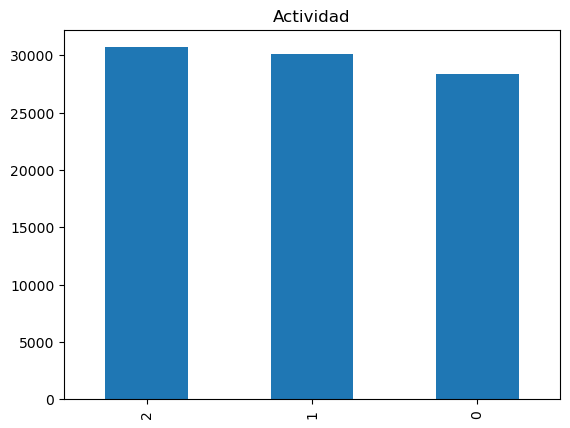

In [4]:
# Barplot con las actividades para ver el balanceo
datos['actividad_cat'].value_counts().plot(kind='bar')
plt.title('Actividad')
plt.show()

Vemos que aproximadamente los datos están balanceados (misma cantidad de cada grupo)

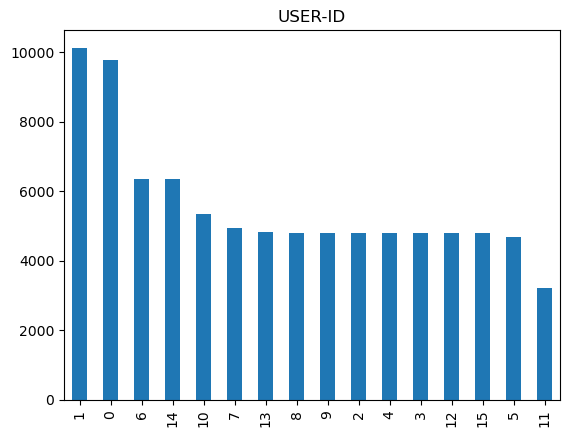

In [5]:
# Realizamos el mismo procedimiento con los usuarios
datos['userID'].value_counts().plot(kind='bar')
plt.title('USER-ID')
plt.show()

Vemos que hay alumnos que han tomado más datos que otros, pero que la mayoría han tomado unos 5000 datos en total.

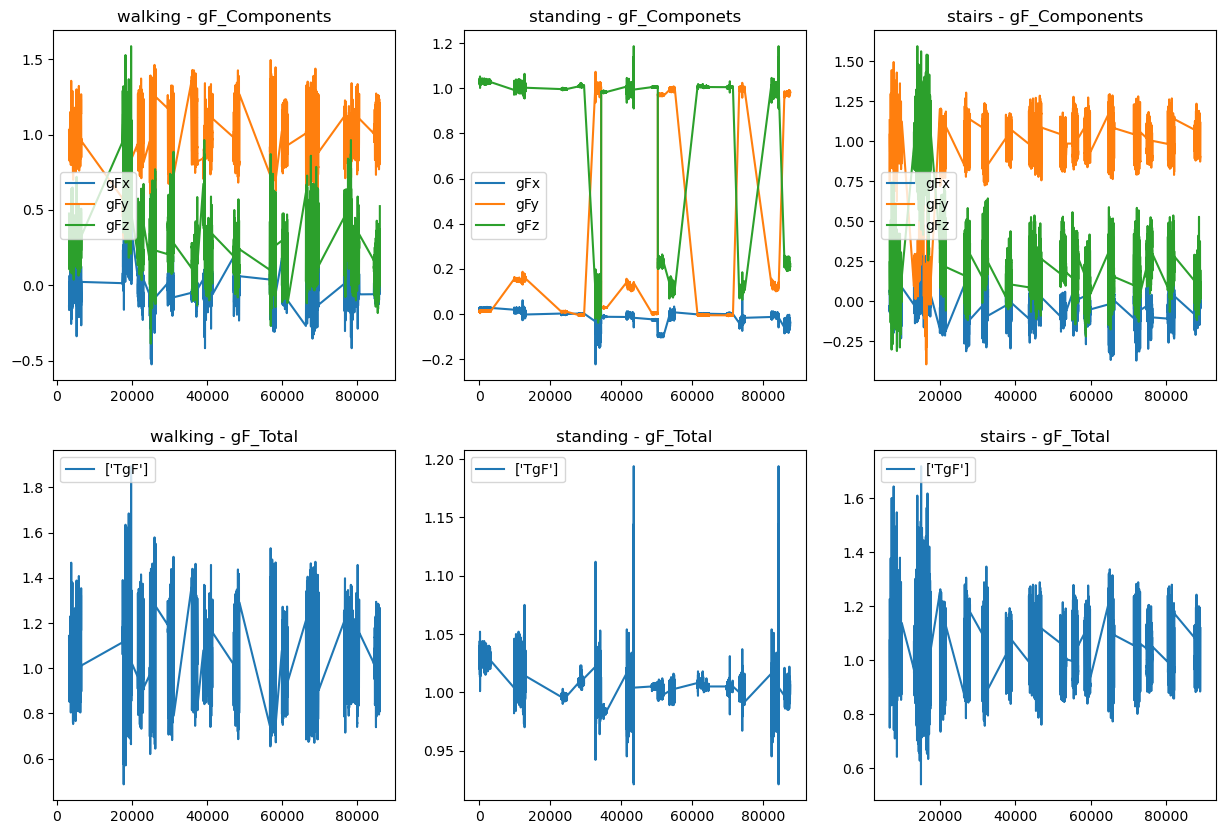

In [6]:
fig, axs = plt.subplots(2,3)
axtitles = np.array([['walking - gF_Components','standing - gF_Componets','stairs - gF_Components'],
['walking - gF_Total','standing - gF_Total','stairs - gF_Total']])

for fila in range(0,2):
    for col in range(0,3):
        if fila == 0:
            axs[fila,col].plot(datos.loc[datos.actividad_cat == col, ['gFx','gFy','gFz']],label = ['gFx','gFy','gFz'] )            
            axs[fila,col].set_title(axtitles[fila][col])
            axs[fila,col].legend(loc = 'center left')
        else:
            axs[fila,col].plot(datos.loc[datos.actividad_cat == col, 'TgF'], label = ['TgF'])
            axs[fila,col].set_title(axtitles[fila][col]) 
            axs[fila,col].legend(loc = 'upper left')

fig.set_size_inches(15,10, forward=True)
plt.savefig("ondas.png")
plt.show()

## Normalización de los datos

Los datos, deben estar normalizados, es decir, comprendidos entre 0 y 1. Esto es muy importante en la regresión logística, para que el modelo no se vea afectado por la escala de los datos. 
Normalizaremos los datos con el método minmax, es decir, para cada variable realizaremos lo siguiente: cada dato menos el mínimo dividido por el rango de la variable, es decir, máximo menos mínimo

In [7]:
# Normalizamos los datos con minmax
datos["gFx"] = (datos["gFx"] - min(datos["gFx"].values)) / (max(datos ["gFx"].values) - min(datos["gFx"].values))
datos["gFy"] = (datos["gFy"] - min(datos["gFy"].values)) / (max(datos ["gFy"].values) - min(datos["gFy"].values))
datos["gFz"] = (datos["gFz"] - min(datos["gFz"].values)) / (max(datos ["gFz"].values) - min(datos["gFz"].values))

Representamos gráficamente para ver que se ha hecho bien, todo debería estar comprendido entre cero y uno.

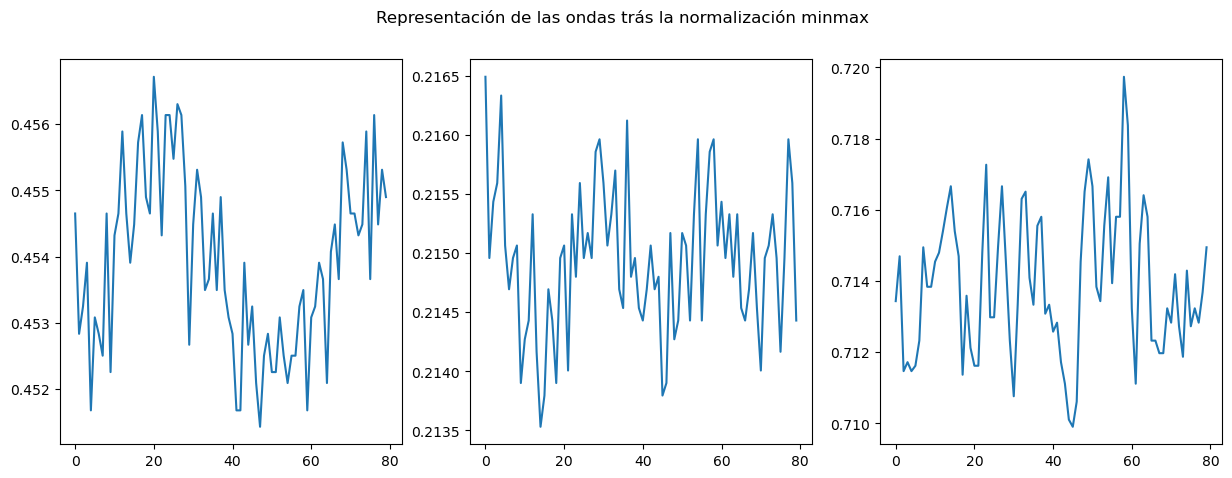

In [8]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
fig.suptitle('Representación de las ondas trás la normalización minmax')
ax1.plot(datos["gFx"].values[:80])

ax2.plot(datos["gFy"].values[:80])

ax3.plot(datos["gFz"].values[:80])
fig.set_size_inches(15,5, forward=True)
plt.show()

## Creación de las secuencias (agrupaciones de datos)


Si recordamos, decidimos tomar \$400*0.05= 2$ segundos para que el algoritmo sea capaz de discriminar (clasificar) la actividad.

Para el **aprovechamiento de los datos**, vamos a solapar las entradas para reaprovechar los datos y tener un conjunto de entrenamiento mayor. Es decir, tendremos una ventana deslizante de dimensión nx1 que irá haciendo (medias, varianzas, cálculos de energía,...) cada n puntos y bajando un nivel cada vez que realiza el cálculo.

Explicaremos el ejemplo con la media: Tomamos las primeras n filas de las señales y calculamos la media por columnas. Para no perder la columna de la actividad, el modelo del móvil y el alumno, tomaremos la moda de esos n datos. De esta manera, habrá medias limpias que sí pertenezcan al mismo usuario, pero algunas otras tendrán algo de ruido, ya que interferirán dos señales diferentes. Sin embargo, es mejor añadir este ruido que trabajar con los datos en crudo sin ningún tipo de pre procesamiento o mezclando todas las señales de todos los usuarios.

In [9]:
# Declaración de variables de interés

ETIQUETAS = ['Standing','Stairs','Walking']
COLNAME_ACT = 'actividad'
USUARIO = 'sujeto'
MODELO = 'movil'
ACTIVIDAD_CAT = 'actividad_cat'
USERID = 'userID'

# Tamaño de la ventana
TIME_PERIODS = 400

# Los pasos a dar de un segmento al siguiente
STEP_DISTANCE = 10

In [10]:
# Definimos la función que va a calcular nuestras nuevas features

def create_segments_and_labels(
    df, time_steps, step, actividad, sujeto, userID, movil, actividad_cat
):
    
    """
    Crea segmentos de las tres características y los 80 timesteps pero solapando de 20 en 20
    Los 400 timesteps salen de los 2 segundos de señal
    Divido el dataset en cachitos de 400x4: 80 filas x 3 señales x,y,z, g
    Meto ruido en algunas muestras, pero es mucho menos ruido que mezclando a las personas
    """
    
    # x, y, z acceleraciones + gravedad
    N_FEATURES = 4
    segments_x_mean = []
    segments_y_mean = []
    segments_z_mean = []
    segments_gf_mean = []
    segments_x_var = []
    segments_y_var = []
    segments_z_var = []
    segments_gf_var = []
    labels = []
    labels_cat = []
    users = []
    users_id = []
    models = []
    segments_x_median = []
    segments_y_median = []
    segments_z_median = []
    segments_gf_median = []
    segments_x_kurtosis = []
    segments_y_kurtosis = []
    segments_z_kurtosis = []
    segments_gf_kurtosis = []
    
    for i in range(0, len(df) - time_steps, step):
        
        # Cálculo de las medias
        xs_m = sum(df["gFx"].values[i : i + time_steps]) / len(
            df["gFx"].values[i : i + time_steps]
        )
        ys_m = sum(df["gFy"].values[i : i + time_steps]) / len(
            df["gFy"].values[i : i + time_steps]
        )
        zs_m = sum(df["gFz"].values[i : i + time_steps]) / len(
            df["gFz"].values[i : i + time_steps]
        )
        gf_m = sum(df["TgF"].values[i : i + time_steps]) / len(
            df["TgF"].values[i : i + time_steps]
        )
        
        # Cálculo de las varianzas = energía
        xs_v = df["gFx"].values[i : i + time_steps].var()
        ys_v = df["gFy"].values[i : i + time_steps].var()
        zs_v = df["gFz"].values[i : i + time_steps].var()
        gf_v = df["TgF"].values[i : i + time_steps].var()
        
        # Cálculo de la mediana
        xs_median = np.median(df["gFx"].values[i : i + time_steps])
        ys_median = np.median(df["gFy"].values[i : i + time_steps])
        zs_median = np.median(df["gFz"].values[i : i + time_steps])
        gf_median = np.median(df["TgF"].values[i : i + time_steps])
        
        # Cálculo de la curtosis
        xs_kurtosis = stats.kurtosis(df["gFx"].values[i : i + time_steps])
        ys_kurtosis = stats.kurtosis(df["gFy"].values[i : i + time_steps])
        zs_kurtosis = stats.kurtosis(df["gFz"].values[i : i + time_steps])
        gf_kurtosis = stats.kurtosis(df["TgF"].values[i : i + time_steps])

        # Lo etiquetamos como la actividad más frecuente. Moda porque hay pasos de cambio de actividad, lo etiqueto como la mayoría
        label = stats.mode(df[actividad][i : i + time_steps])[0][0]
        user = stats.mode(df[sujeto][i : i + time_steps])[0][0]
        userid = stats.mode(df[userID][i : i + time_steps])[0][0]
        model = stats.mode(df[movil][i : i + time_steps])[0][0]
        label_cat = stats.mode(df[actividad_cat][i : i + time_steps])[0][0]

        segments_x_mean.append(xs_m)
        segments_y_mean.append(ys_m)
        segments_z_mean.append(zs_m)
        segments_gf_mean.append(gf_m)
        segments_x_var.append(xs_v)
        segments_y_var.append(ys_v)
        segments_z_var.append(zs_v)
        segments_gf_var.append(gf_v)
        segments_x_median.append(xs_median)
        segments_y_median.append(ys_median)
        segments_z_median.append(zs_median)
        segments_gf_median.append(gf_median)
        segments_x_kurtosis.append(xs_kurtosis)
        segments_y_kurtosis.append(ys_kurtosis)
        segments_z_kurtosis.append(zs_kurtosis)
        segments_gf_kurtosis.append(gf_kurtosis)
        labels.append(label)
        users.append(user)
        models.append(model)
        labels_cat.append(label_cat)
        users_id.append(userid)

    return (
        labels,
        users,
        models,
        labels_cat,
        users_id,
        segments_x_mean,
        segments_y_mean,
        segments_z_mean,
        segments_gf_mean,
        segments_x_var,
        segments_y_var,
        segments_z_var,
        segments_gf_var,
        segments_x_median,
        segments_y_median,
        segments_z_median,
        segments_gf_median,
        segments_x_kurtosis,
        segments_y_kurtosis,
        segments_z_kurtosis,
        segments_gf_kurtosis
    )

In [11]:
data_segments = create_segments_and_labels(
    datos,
    TIME_PERIODS,
    STEP_DISTANCE,
    COLNAME_ACT,
    USUARIO,
    USERID,
    MODELO,
    ACTIVIDAD_CAT,
)

Obtenemos una tupla (lista) con los siguientes elementos:

    - Un narray de numpy con las etiquetas de la actividad
    - Una lista con los usuarios
    - Una lista con los modelos de móviles
    - Una lista con las etiquetas de las categorías
    - Una lista con los USERS_id
    - Una lista con cada una de las agrupaciones de las medidas
    
La longitud de los nuevos datos será: $$\text{longitud}=\dfrac{\text{Long_inicial}}{\text{ventana}} \dfrac{\text{ventana}}{\text{paso}} = \dfrac{89164}{400}  \dfrac{400}{20} = 4439$$

In [12]:
# Creamos un df vacío y añadimos las diferentes columnas tras aplicar la función
dat_trans = pd.DataFrame()
dat_trans['actividad'] = data_segments[0]
dat_trans['sujeto'] =data_segments[1]
dat_trans['movil'] =data_segments[2]
dat_trans['actividad_cat'] =data_segments[3]
dat_trans['userID'] =data_segments[4]
dat_trans['gFx_mean'] =data_segments[5]
dat_trans['gFy_mean'] =data_segments[6]
dat_trans['gFz_mean'] =data_segments[7]
dat_trans['TgF_mean'] =data_segments[8]
dat_trans['gFx_energia'] =data_segments[9]
dat_trans['gFy_energia'] =data_segments[10]
dat_trans['gFz_energia'] =data_segments[11]
dat_trans['TgF_energia'] =data_segments[12]
dat_trans['gFx_median'] =data_segments[13]
dat_trans['gFy_median'] =data_segments[14]
dat_trans['gFz_median'] =data_segments[15]
dat_trans['TgF_median'] =data_segments[16]
dat_trans['gFx_kurtosis'] =data_segments[17]
dat_trans['gFy_kurtosis'] =data_segments[18]
dat_trans['gFz_kurtosis'] =data_segments[19]
dat_trans['TgF_kurtosis'] =data_segments[20]

dat_trans

,actividad,sujeto,movil,actividad_cat,userID,gFx_mean,gFy_mean,gFz_mean,TgF_mean,gFx_energia,...,gFz_energia,TgF_energia,gFx_median,gFy_median,gFz_median,TgF_median,gFx_kurtosis,gFy_kurtosis,gFz_kurtosis,TgF_kurtosis
0,Standing,Alvaro,Unespecified,1,0,0.453964,0.215190,0.714026,1.028427,0.000002,...,0.000008,0.000032,0.453907,0.215169,0.714091,1.029,-0.204074,1.295220,3.594879,3.564981
1,Standing,Alvaro,Unespecified,1,0,0.453949,0.215213,0.714001,1.028377,0.000002,...,0.000008,0.000034,0.453907,0.215328,0.714091,1.029,-0.216089,1.218556,3.279499,3.253851
2,Standing,Alvaro,Unespecified,1,0,0.453913,0.215260,0.714070,1.028515,0.000002,...,0.000009,0.000034,0.453907,0.215328,0.714192,1.029,-0.157667,1.253833,3.032582,3.002477
3,Standing,Alvaro,Unespecified,1,0,0.453945,0.215294,0.714116,1.028607,0.000002,...,0.000009,0.000034,0.453907,0.215328,0.714192,1.029,0.075939,1.094705,3.030501,2.999445
4,Standing,Alvaro,Unespecified,1,0,0.454027,0.215309,0.714124,1.028635,0.000002,...,0.000009,0.000034,0.453907,0.215328,0.714192,1.029,0.017434,1.081896,3.108663,3.065008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,Walking,Marta,Unespecified,2,13,0.424058,0.732716,0.261309,1.003285,0.001295,...,0.001842,0.006521,0.424831,0.720719,0.253920,0.974,0.508609,-0.085918,4.629178,-0.292049
8873,Walking,Marta,Unespecified,2,13,0.424075,0.733161,0.261598,1.004203,0.001298,...,0.001845,0.006468,0.424955,0.722278,0.254525,0.980,0.491520,-0.081640,4.564161,-0.289616
8874,Walking,Marta,Unespecified,2,13,0.423986,0.733822,0.262531,1.005702,0.001299,...,0.001852,0.006449,0.424831,0.724974,0.255155,0.989,0.480225,-0.128577,4.377897,-0.334548
8875,Walking,Marta,Unespecified,2,13,0.423832,0.734330,0.262427,1.006648,0.001294,...,0.001859,0.006482,0.424831,0.725238,0.255205,0.989,0.497333,-0.209992,4.338872,-0.396065


In [13]:
dat_trans.to_csv("combined_and_transformed_data.csv", index=False)

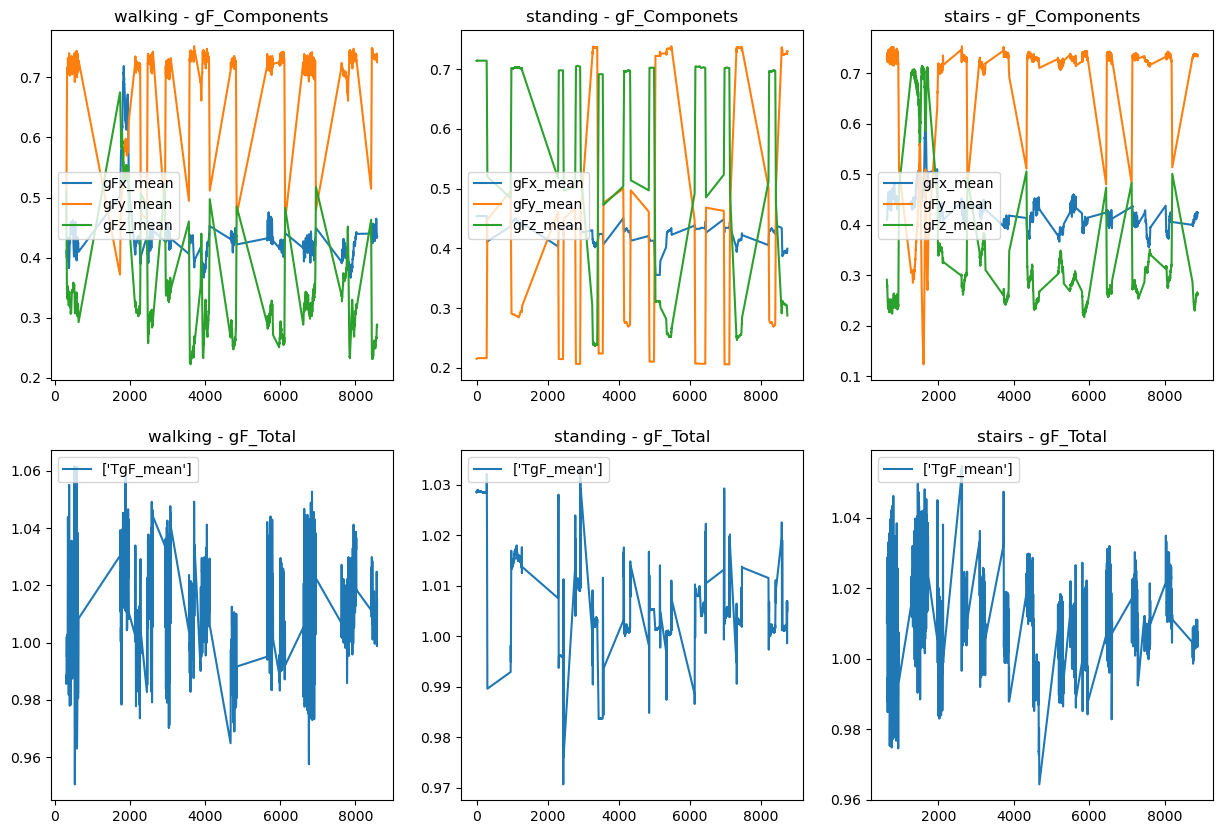

In [14]:
# Visulizamos la media móvil

fig, axs = plt.subplots(2,3)
axtitles = np.array([['walking - gF_Components','standing - gF_Componets','stairs - gF_Components'],
['walking - gF_Total','standing - gF_Total','stairs - gF_Total']])

for fila in range(0,2):
    for col in range(0,3):
        if fila == 0:
            axs[fila,col].plot(dat_trans.loc[dat_trans.actividad_cat == col, ['gFx_mean','gFy_mean','gFz_mean']],label = ['gFx_mean','gFy_mean','gFz_mean'] )            
            axs[fila,col].set_title(axtitles[fila][col])
            axs[fila,col].legend(loc = 'center left')
        else:
            axs[fila,col].plot(dat_trans.loc[dat_trans.actividad_cat == col, 'TgF_mean'], label = ['TgF_mean'])
            axs[fila,col].set_title(axtitles[fila][col]) 
            axs[fila,col].legend(loc = 'upper left')

fig.set_size_inches(15,10, forward=True)
plt.savefig("ondas_medias_transf_mean.png")
plt.show()

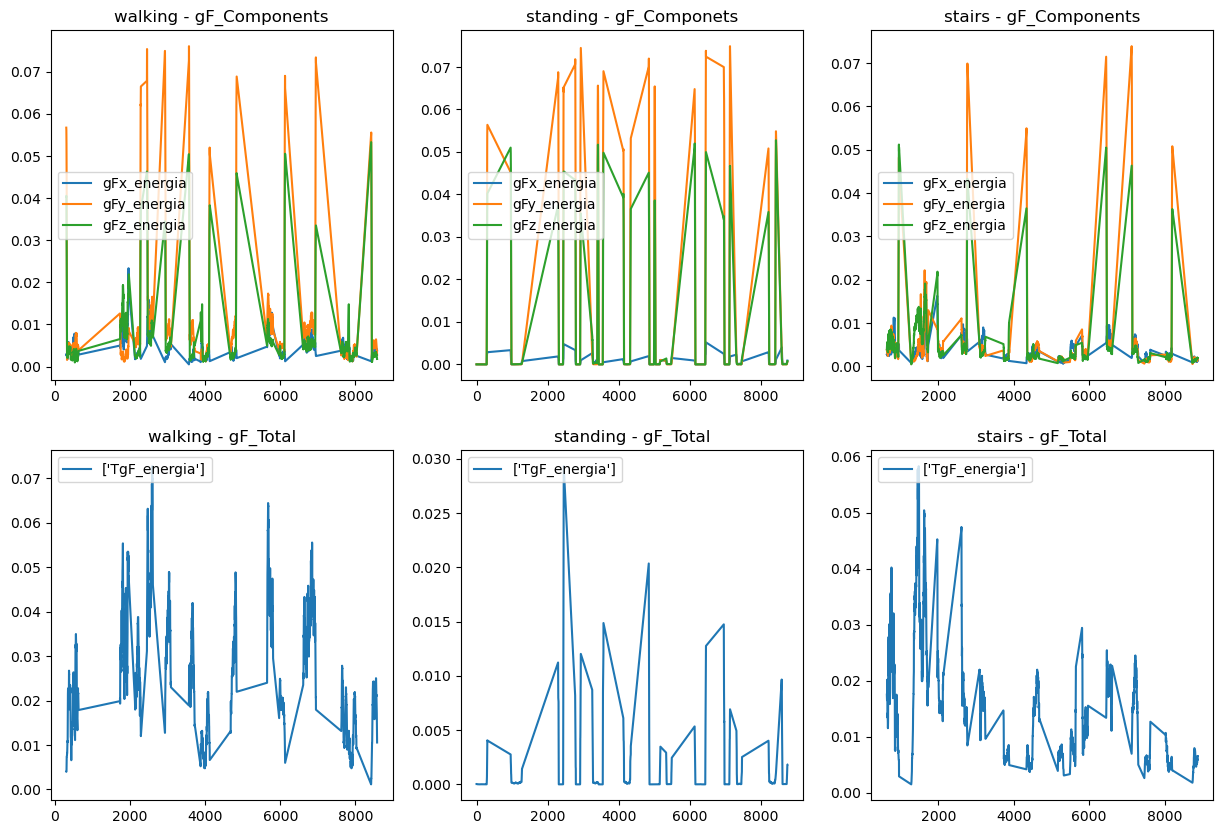

In [15]:
# Visualizamos la energía móvil

fig, axs = plt.subplots(2,3)
axtitles = np.array([['walking - gF_Components','standing - gF_Componets','stairs - gF_Components'],
['walking - gF_Total','standing - gF_Total','stairs - gF_Total']])

for fila in range(0,2):
    for col in range(0,3):
        if fila == 0:
            axs[fila,col].plot(dat_trans.loc[dat_trans.actividad_cat == col, ['gFx_energia','gFy_energia','gFz_energia']],label = ['gFx_energia','gFy_energia','gFz_energia'] )            
            axs[fila,col].set_title(axtitles[fila][col])
            axs[fila,col].legend(loc = 'center left')
        else:
            axs[fila,col].plot(dat_trans.loc[dat_trans.actividad_cat == col, 'TgF_energia'], label = ['TgF_energia'])
            axs[fila,col].set_title(axtitles[fila][col]) 
            axs[fila,col].legend(loc = 'upper left')

fig.set_size_inches(15,10, forward=True)
plt.savefig("ondas_medias_transf_energia.png")
plt.show()

## División del dataset en entrenamiento y testeo

Como cada usuario ha realizado cada actividad, por tanto no vamos a mezclar usuarios: división de entrenamiento y testeo según ID de usuario. Tenemos 16 usuarios, por lo que usaremos 13 usuarios (IDs 0-12) para el entrenamiento y otros 3 (IDs 13-15) para el testeo. Esto hará que la partición sea aproximadamente del 80/20 para entrenamiento y test, respectivamente.

Optamos por esta división para coger ondas completas, es decir, no coger unos segundos de la onda del usuario 1 y los segundos restantes para el usuario 2. Esto hará que haya menos ruido y nuestro objetivo es que el algoritmo sea más óptimo a la hora de clasificar la actividad.

In [16]:
# Constraints:
## No train-test split: algunos usuarios para entrenamiento
## No mezclo usuarios: todos los usuarios han hecho todas las actividades

df_test =  dat_trans[dat_trans['userID'] > 12]
df_train = dat_trans[dat_trans['userID'] <= 12]

print("Entrenamiento", df_train.shape)
print("Test", df_test.shape)

# Comprobamos cual ha sido la división

print("Proporción de datos para entrenamiento: ", df_train.shape[0]/dat_trans.shape[0])
print("Propoción de datos para testeo: ", df_test.shape[0]/dat_trans.shape[0])

Entrenamiento (7303, 21)
Test (1574, 21)
Proporción de datos para entrenamiento:  0.8226878449926777
Propoción de datos para testeo:  0.17731215500732228


In [17]:
# Guardamos los datasets de entrenamiento y testeo como csv

df_test.to_csv("test_data.csv", index=False)
df_train.to_csv("train_data.csv", index=False)

In [18]:
# Dividimos las variables en X e y

y_test = df_test['actividad_cat']
y_train = df_train['actividad_cat']

X_test = df_test.drop(columns={'actividad_cat','sujeto','actividad'}, axis = 1)
X_train = df_train.drop(columns={'actividad_cat','sujeto','actividad'}, axis = 1)

In [19]:
X_train

,movil,userID,gFx_mean,gFy_mean,gFz_mean,TgF_mean,gFx_energia,gFy_energia,gFz_energia,TgF_energia,gFx_median,gFy_median,gFz_median,TgF_median,gFx_kurtosis,gFy_kurtosis,gFz_kurtosis,TgF_kurtosis
0,Unespecified,0,0.453964,0.215190,0.714026,1.028427,0.000002,0.000001,0.000008,0.000032,0.453907,0.215169,0.714091,1.0290,-0.204074,1.295220,3.594879,3.564981
1,Unespecified,0,0.453949,0.215213,0.714001,1.028377,0.000002,0.000001,0.000008,0.000034,0.453907,0.215328,0.714091,1.0290,-0.216089,1.218556,3.279499,3.253851
2,Unespecified,0,0.453913,0.215260,0.714070,1.028515,0.000002,0.000001,0.000009,0.000034,0.453907,0.215328,0.714192,1.0290,-0.157667,1.253833,3.032582,3.002477
3,Unespecified,0,0.453945,0.215294,0.714116,1.028607,0.000002,0.000001,0.000009,0.000034,0.453907,0.215328,0.714192,1.0290,0.075939,1.094705,3.030501,2.999445
4,Unespecified,0,0.454027,0.215309,0.714124,1.028635,0.000002,0.000001,0.000009,0.000034,0.453907,0.215328,0.714192,1.0290,0.017434,1.081896,3.108663,3.065008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,Samsung,12,0.402794,0.675592,0.408827,0.988920,0.001973,0.002562,0.004624,0.011046,0.403849,0.662421,0.410814,0.9685,-0.262566,-0.352007,-0.150601,0.612274
7778,Samsung,12,0.403589,0.676142,0.409546,0.990363,0.001950,0.002544,0.004578,0.010875,0.406080,0.663584,0.410814,0.9710,-0.209149,-0.343077,-0.110387,0.659319
7779,Samsung,12,0.405153,0.677355,0.410188,0.992855,0.001890,0.002459,0.004582,0.010561,0.408310,0.665909,0.414948,0.9730,-0.103057,-0.269174,-0.123802,0.745339
7780,Samsung,12,0.406693,0.678968,0.412470,0.997355,0.001852,0.002377,0.004459,0.009929,0.410499,0.668155,0.418099,0.9790,-0.040293,-0.207302,-0.032872,0.882317
